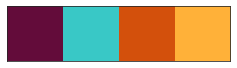

In [77]:
from typing import NamedTuple
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [78]:
songs = pd.read_csv(".\dataset\mySongsDataset.csv")

songs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2889 non-null   object 
 1   artist        2889 non-null   object 
 2   id            2889 non-null   object 
 3   danceability  2889 non-null   float64
 4   energy        2889 non-null   float64
 5   loudness      2889 non-null   float64
 6   speechiness   2889 non-null   float64
 7   acousticness  2889 non-null   float64
 8   tempo         2889 non-null   float64
 9   liveness      2889 non-null   float64
 10  valence       2889 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.4+ KB


In [79]:
songs.head()

,name,artist,id,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.603,-4.892,0.2260,0.02720,123.061,0.1670,0.497
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.390,-11.033,0.0524,0.83700,87.512,0.1010,0.530
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.692,-6.643,0.0262,0.47800,104.095,0.0446,0.965
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.849,-5.216,0.0833,0.00014,94.964,0.4230,0.503
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.916,-4.698,0.0644,0.00285,186.941,0.2630,0.338


In [80]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

In [81]:
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.913635,0.2260,0.02720,0.1670
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.750193,0.0524,0.83700,0.1010
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.867032,0.0262,0.47800,0.0446
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.905012,0.0833,0.00014,0.4230
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.918798,0.0644,0.00285,0.2630


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

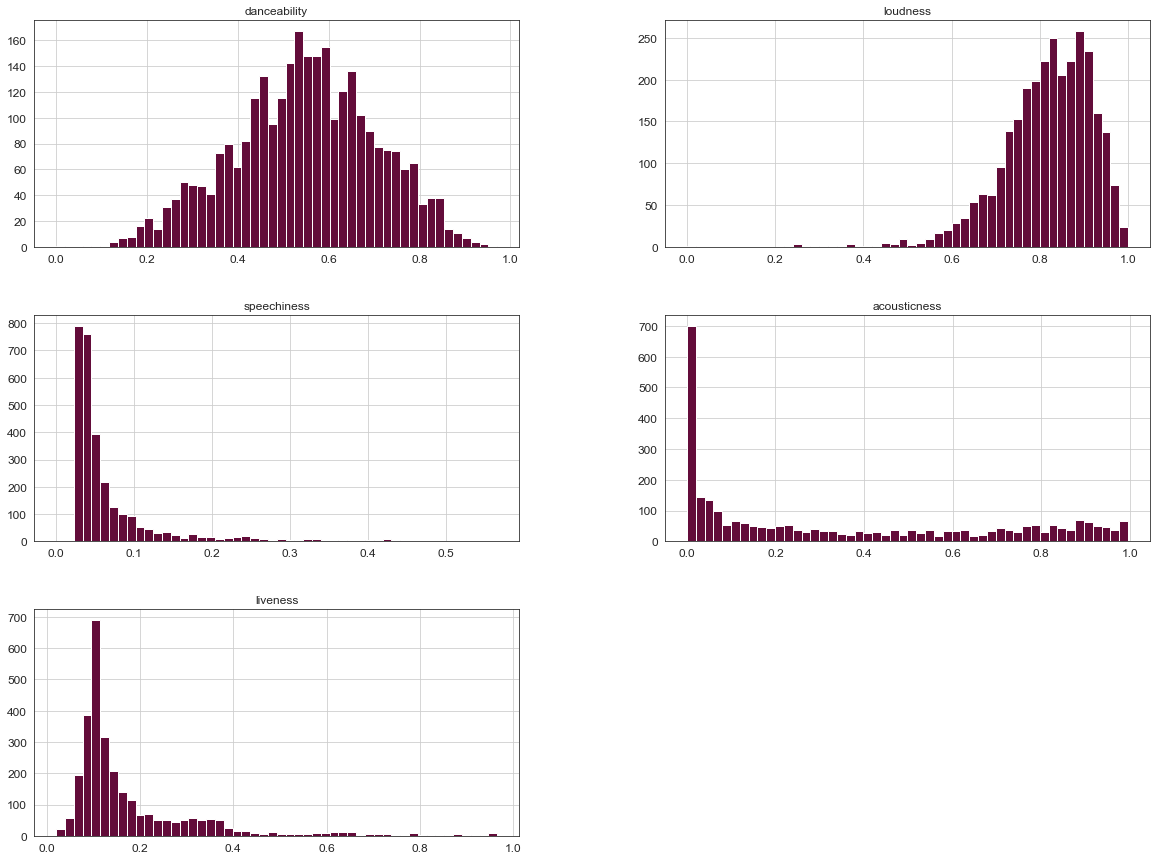

In [82]:
songs.hist(bins=50,figsize=(20,15))

In [83]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [84]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [85]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5076157656291582)
For n_clusters = 3, silhouette score is 0.3439986619104982)
For n_clusters = 4, silhouette score is 0.35157603800617043)
For n_clusters = 5, silhouette score is 0.2768062650655817)
For n_clusters = 6, silhouette score is 0.26109266344645127)
For n_clusters = 7, silhouette score is 0.26043010397834165)
For n_clusters = 8, silhouette score is 0.2567040400421065)
For n_clusters = 9, silhouette score is 0.23498883892713487)
For n_clusters = 10, silhouette score is 0.2412500740611418)
For n_clusters = 11, silhouette score is 0.24173005896239938)
For n_clusters = 12, silhouette score is 0.23479700315870464)
For n_clusters = 13, silhouette score is 0.2321942052770562)
For n_clusters = 14, silhouette score is 0.22976551930715305)


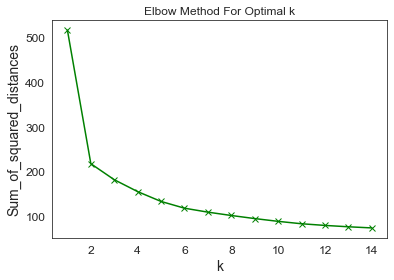

In [86]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [138]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [139]:
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

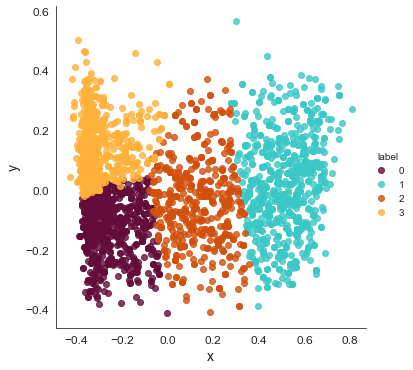

In [140]:

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [141]:
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

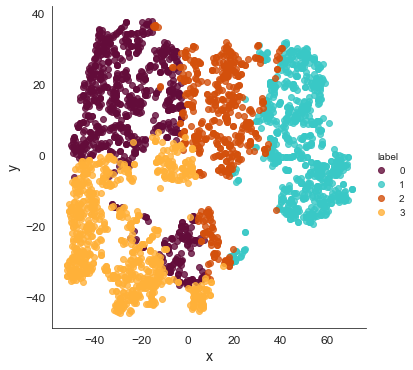

In [142]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [144]:
pca.explained_variance_ratio_

array([0.69392072, 0.1385622 ])

In [145]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.042347 -0.198992    -0.023744       0.97634 -0.069326
PC-2     -0.968245 -0.011416    -0.054485      -0.02846  0.242060


In [146]:
songs['label'] = y_kmeans

In [147]:
songs = songs.sample(frac=1)
songs['label'].value_counts()

0    818
3    796
1    746
2    529
Name: label, dtype: int64

In [153]:
songs[songs['label'] == 0].tail(50) #Happy

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2430,Hustler,Zayde Wølf,0RmUjJteEkkF5kKdhEfwNe,0.575,0.929710,0.0456,0.039300,0.0919,0
114,Sweet (feat. Landon Sears),Bren Joy,3IPBftcOHWxzLFyH5svvnY,0.623,0.861496,0.1240,0.174000,0.0684,0
190,Provider,Frank Ocean,6R6ihJhRbgu7JxJKIbW57w,0.654,0.726453,0.2820,0.740000,0.1520,0
2052,Jour d'ete a la montagne: I. Pastorale,Eugène Bozza,5c16pzZ9b0LabmfuiLLTLl,0.194,0.635323,0.0449,0.996000,0.0803,0
2129,Amory,Emmy Curl,5gXAV0HhoavuCHogU0UTgz,0.634,0.851808,0.0287,0.703000,0.0808,0
586,Pac-Man (feat. ScHoolboy Q),Gorillaz,26qAAE6mQZlS0GhqnWheU6,0.762,0.898677,0.0961,0.273000,0.3330,0
954,Reckoner,Radiohead,56Z7hbyMrndw1naxb6I5Oi,0.518,0.845873,0.0264,0.511000,0.0679,0
623,Cycles,WILLOW,6gxrNepquIl6iZZa37eeBg,0.797,0.889202,0.0805,0.126000,0.1160,0
2454,Second to None,Styles Of Beyond,74tniZL9pNCKMnJYC5KfrW,0.731,0.897586,0.1810,0.023200,0.3350,0
549,Mascarados,Rubel,0MQd936ddplaIvGnFm6H7i,0.513,0.718681,0.0382,0.601000,0.1390,0


In [154]:
songs[songs['label'] == 1].head(50) #Energetic

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1432,Postcards From Italy - Demo,Florence + The Machine,1JHxHclJN6LJwXpBICdN25,0.641,0.831555,0.0301,0.951000,0.0988,1
1528,Portugal Na CEE,GNR,1eHUisttmmzXYhQ5hu3mSi,0.532,0.898491,0.0732,0.522000,0.2690,1
2457,Beginning of the fight,mabanua,0ZVxRlcQZMPiTADrjYabUZ,0.698,0.890427,0.0866,0.001400,0.0903,1
541,Nadir,TENDER,5pGCxazPxShO5jBpOyM85f,0.389,0.895430,0.0497,0.034900,0.0861,1
1320,Tudo por Ti,O Terno,6KPXevsC17kJPQZkdZgKjb,0.511,0.917494,0.1950,0.348000,0.5750,1
2637,Midnight Hands,Rise Against,45m4ag7gCHx3uKnSpOYFSO,0.285,0.949112,0.0481,0.000174,0.0684,1
1155,Seven,Thundercat,1yTchZY8agOgavp18uw8jw,0.744,0.767892,0.0757,0.017000,0.6310,1
2137,Nobody Else but You,Emmy Curl,1jYETZdN2kVOPcS9327mzV,0.297,0.593884,0.0346,0.957000,0.0816,1
2018,Gates,The Paper Kites,6BtiPndhK5ujAakTfEAR02,0.452,0.667368,0.0290,0.897000,0.1050,1
177,Every Other Freckle,alt-J,0HV1cGoX5ASBlPA1pqH8fG,0.528,0.840870,0.0822,0.625000,0.1160,1


In [155]:
songs[songs['label'] == 2].tail(50) #Calm

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
679,"Analog 2 (feat. Tyler, The Creator, Frank Ocea...",Odd Future,0d8ONGx43ZprlHlmLZODpD,0.599,0.821255,0.5660,0.229000,0.0660,2
2885,All Singing and All Dancing,Biffy Clyro,4plMohViHqukLshtIDd8vy,0.554,0.936870,0.0285,0.000330,0.1590,2
1891,A Pele Que Há Em Mim [Quando o dia Entardeceu]...,Márcia,5f9hHZTRYQDngnrt3o2IOC,0.637,0.684321,0.0374,0.924000,0.1110,2
351,Parachute,Caroline Polachek,3ha7MSw0EdLTuXG7MOWU7F,0.200,0.686424,0.0310,0.795000,0.0765,2
1323,Quando Bate Aquela Saudade,Rubel,76bcaYeKOKTrj9lEc9BZFU,0.550,0.667687,0.0326,0.895000,0.1880,2
45,Don't Matter,Akon,12yGwtB2h9NlzeOKYfVYTF,0.801,0.883214,0.0371,0.225000,0.2260,2
2489,Saturnz Barz (feat. Popcaan),Gorillaz,7l9CE3wmEGOUYw1j4ETjnL,0.383,0.887393,0.1130,0.027200,0.4270,2
1064,Somebody Told Me,The Killers,3twNvmDtFQtAd5gMKedhLD,0.502,0.938440,0.0793,0.000068,0.0627,2
1939,"Female Energy, Part 2",WILLOW,0W95eMaAxNVYTquOsXXkC5,0.539,0.821840,0.0293,0.014300,0.1740,2
2060,Maya,Ian Clarke,20MCOMaJmMlN6VcRRe4TLi,0.307,0.477763,0.0404,0.992000,0.1130,2


In [99]:
songs[songs['label'] == 3].tail(50) #Sad

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2648,Sudden Life,Rise Against,2KhNhfoef1IphjMz6v2lEW,0.266,0.952466,0.0521,0.001690,0.2110,3
2517,Break The Fall,Papa Roach,7JIHGWA6uT33iN2zuiakvy,0.486,0.870120,0.4100,0.011600,0.0809,3
2514,The Ending,Papa Roach,4lFOhx1hVbzOFQY7CLrThc,0.539,0.924520,0.0469,0.100000,0.1000,3
202,Cigarettes,Tash Sultana,4ywIrrFcXcD8DTn3EuGYxd,0.557,0.909376,0.2330,0.032000,0.0598,3
101,Вы,Дайте танк (!),1vQRta0wrnO3p0LxZP3dtU,0.374,0.972720,0.0904,0.178000,0.2480,3
2570,What It Takes,Adelitas Way,5f7CQQlWscLYxkdzaKWx5Q,0.516,0.927847,0.0755,0.001440,0.0940,3
1684,"Female Energy, Part 2",WILLOW,0W95eMaAxNVYTquOsXXkC5,0.539,0.821840,0.0293,0.014300,0.1740,3
2301,Leaving Tonight,The Neighbourhood,0p8dPSu0ZGzGYbOhWwenXS,0.565,0.899076,0.0309,0.014700,0.1020,3
712,It Was A Monstering,Everything Everything,0cuoZwBeEpDlRZsOiwslAG,0.420,0.813244,0.0342,0.016600,0.2380,3
544,Sono Com Medo,Primeira Dama,1Ug6cD12V9Z43nyWAGuWQZ,0.454,0.767014,0.0412,0.189000,0.1490,3


In [160]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)
cross_val_score(rfc,X,y,cv=5)

array([0.98615917, 0.97750865, 0.99307958, 0.96366782, 0.97746967])

In [161]:
y_pred = rfc.predict(X_test)

In [162]:
X_train

,danceability,loudness,speechiness,acousticness,liveness
881,0.624,0.742075,0.0288,0.0831,0.0879
1437,0.288,0.708647,0.0369,0.6100,0.1120
2669,0.695,0.822692,0.0403,0.3010,0.0583
2011,0.435,0.790940,0.0410,0.5350,0.1620
471,0.841,0.785431,0.0425,0.3170,0.1830
...,...,...,...,...,...
993,0.619,0.819658,0.0376,0.4270,0.2120
2338,0.351,0.774785,0.0333,0.9340,0.0950
1375,0.803,0.679424,0.0367,0.8680,0.1040
1560,0.637,0.845794,0.0335,0.1350,0.2650


In [134]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[262   0   1   8]
 [  0 242   3   0]
 [  2   5 161   2]
 [  4   0   0 264]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

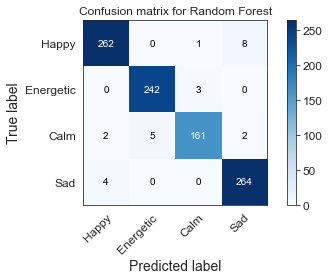

In [163]:
#definitions=['Energetic','Depressed','Sad','Calm','Happy','Contentment','Frantic','Exuberant']
definitions=["Happy",'Energetic','Calm','Sad']
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [164]:
import pickle

with open('MOODAI.pickle','wb') as fe_data_file:
     pickle.dump(rfc, fe_data_file)

In [110]:
#Code Example
#Import the module
#import pickle
#Load the data - No need to do Feature Engineering again
#with open('fe_data.pickle','rb') as fe_data_file:
#     feature_engineered_data = pickle.load(fe_data_file)
#Continue with your modeling


In [156]:
songs[songs["artist"]=="Billie Eilish"]

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2338,lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,0.351,0.774785,0.0333,0.93400,0.0950,0
2412,Therefore I Am,Billie Eilish,54bFM56PmE4YLRnqpW6Tha,0.889,0.836957,0.0697,0.21800,0.0550,2
2331,wish you were gay,Billie Eilish,3Fj47GNK2kUF0uaEDgXLaD,0.853,0.772416,0.2410,0.39000,0.7520,3
2335,bury a friend,Billie Eilish,4SSnFejRGlZikf02HLewEF,0.905,0.657786,0.3320,0.74000,0.1060,0
2339,my boy,Billie Eilish,1RGasjWLZ4qMN7wbtkLa3u,0.692,0.811088,0.2070,0.47200,0.1170,0
2343,Bored,Billie Eilish,04sN26COy28wTXYj3dMoiZ,0.614,0.705959,0.0478,0.89600,0.0795,0
2342,COPYCAT,Billie Eilish,5w7wuzMzsDer96KqxafeRK,0.679,0.751683,0.0932,0.35300,0.3410,0
2332,when the party's over,Billie Eilish,43zdsphuZLzwA9k4DJhU0I,0.367,0.668991,0.0972,0.97800,0.0897,2
2333,8,Billie Eilish,6X29iaaazwho3ab7GNue5r,0.735,0.691481,0.3150,0.69800,0.1070,2
2336,ilomilo,Billie Eilish,7qEKqBCD2vE5vIBsrUitpD,0.855,0.643441,0.0585,0.72400,0.0896,0
